# Data Science Course Week 2 - Lesson 2 
# Introduction to Linear Regression


Regression is the process of learning a mapping from a vector of input data to a quantitative output given a set of observations. For example, coordinates in a room to Wi-Fi signal strength, someone's Body Mass Index to their life expectancy or a stock's performance over the last 5 days to its value tomorrow.

There are numerous methods for addressing this problem, each with their own set of assumptions and behaviour. Some are ideal for tackling large volumes of data while others provide more informative probabilistic outputs.

In this lab, we'll focus on Linear Regression; a good point of reference for many other regression techniques and still used widely around the world today due to their simplicity and favourable scaling characteristics.

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

# Class Workshop

In [36]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

Here we are using a dataset of chicago house prices. The dataset is made up of houses that sold and several variables that describe the data. 

In [37]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)

In [38]:
house_data.head()

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0


In [39]:
# do we have any missing data? yes
house_data.isnull().sum() 

Address             0
Neighborhood        0
HouseType           3
Price               0
Bath              149
CrimeIndex          0
MinutesToLoop       0
MilesToLake         0
Age                 0
LotSizeSqft         0
HouseSizeSqft       0
SchoolIndex         0
EstimatedPrice      0
dtype: int64

In [40]:
# Summarise the data
#house_data.describe()
#house_data.describe(include=['object'])
house_data.describe(include='all')

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,219,219,216,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
unique,219,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"2054 W Augusta Blvd #1, Chicago IL",Wicker Park,Condo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,219,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,NaN,NaN,NaN,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,NaN,NaN,NaN,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,NaN,NaN,NaN,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,NaN,NaN,NaN,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,NaN,NaN,NaN,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05


In [41]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1169d0278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1190922e8>]], dtype=object)

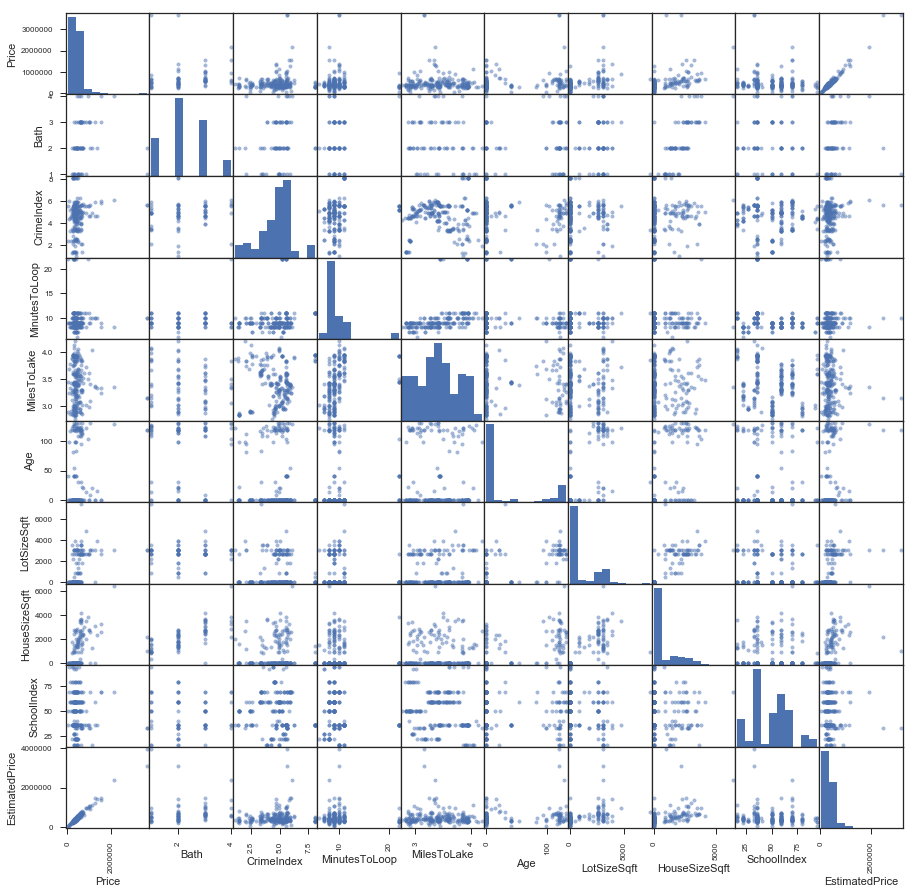

In [42]:
# Plot each variable against each other 
# scroll down past the subplot information
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
 - The dataset is looking at a set of house sales and attempting to find relationships between different characteristics of the house and the price achieved at sale. 
- What looks to be affecting house prices from our initial inspection?
 - From the initial inspection, it looks like lot and house size have a linear impact on the price achieved. 
 - There is a clear correlation between estimated price and price.
- What is the type of relationship in those variables affecting price?
 - It seems like they're linear.

In [43]:
# create a fitted model in one line
lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()

# print the coefficients!
lm.params

# the bigger the coefficient, the less correlation ... usually

Intercept        508310.776747
Bath             -28995.658012
HouseSizeSqft       133.011874
dtype: float64

The summary function provided by the statsmodel library presents lots of useful information about the resulting model.

Key items to pay attention to are:
- R-squared
- Adj. R-Squared
- coef (for each variable)

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.340
Date:                Thu, 01 Jun 2017   Prob (F-statistic):              0.269
Time:                        20:31:54   Log-Likelihood:                -1030.2
No. Observations:                  70   AIC:                             2066.
Df Residuals:                      67   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      5.083e+05   2.05e+05      2.478      0.016      9.89e+04  9.18e+05
Bath            -2.9e+04   1.16e+05     -0.250      0.803     -2.61e+05  2.03e+05
HouseSizeSqft   133.0119     99.854      1.332      0.187       -66.297   332.321
==============================================================================
Omnibus:                       85.337   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.863
Skew:                           3.754   Prob(JB):                    2.16e-194
Kurtosis:                      18.793   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
508310 -28995.66*3 + 133*350

467873.02

## Student Excercise

Now try creating a regression from just the EstimatedPrice

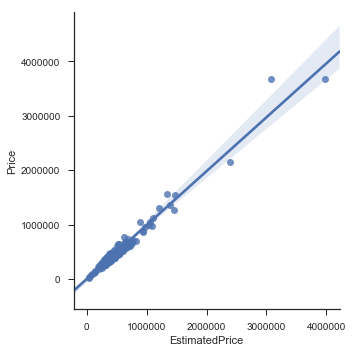

In [46]:
# check the distribution of Price vs. EstimatedPrice using a scatterplot
import seaborn as sns
sns.set_style("ticks")

sns.lmplot(y='Price', x='EstimatedPrice', data=house_data)

In [47]:
# Let's try just modelling just using the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ EstimatedPrice ', data=house_data).fit()

# print the coefficients
lm.params

Intercept         2371.037940
EstimatedPrice       0.989389
dtype: float64

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     6529.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):          6.25e-164
Time:                        20:31:54   Log-Likelihood:                -2758.9
No. Observations:                 219   AIC:                             5522.
Df Residuals:                     217   BIC:                             5529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2371.0379   7685.764      0.308      0.758     -1.28e+04  1.75e+04
EstimatedPrice     0.9894      0.012     80.801      0.000         0.965     1.014
==============================================================================
Omnibus:                      198.218   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8006.566
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.941   Cond. No.                     9.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question:
Did the model built on just Estimated Price have a better R-Squared value than the prior model built using Bath and HouseSizeSqft? Yes.

### Predicting Price using the built model


Now we will find out what the model estimates the price will be for the the minimum and maximium values of EstimatedPrice

In [49]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
# these values will be be used in the built model to predict the Price
X_new = pd.DataFrame({'EstimatedPrice': [house_data.EstimatedPrice.min(), house_data.EstimatedPrice.max()]})
X_new.head()

,EstimatedPrice
0,28836.5
1,3973508.0


In [50]:
# predict price given two data points and the built model

preds = lm.predict(X_new)
preds

array([   30901.56354902,  3933717.48261279])

Now lets view a line representing the model build off just Estimated Price, over a scatter plot of the data of Price vs. EstimatedPrice.

To produce the line overlay, we will simply plot a straight line between the two predicted points over the scatter plot. 

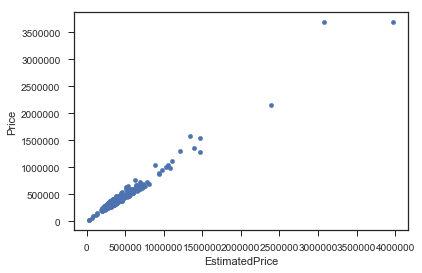

In [51]:
# first, plot the observed data
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')

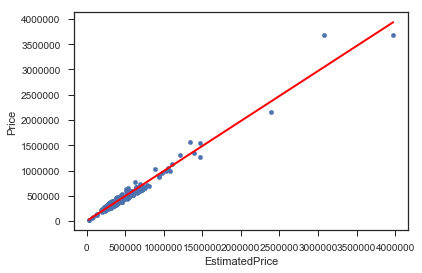

In [52]:
# Now, plot a line over the points that uses just the two points
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')
# this code overlays a straight line between the the coordinates created by X_new and preds
plt.plot(X_new, preds, c='red', linewidth=2)

### Experiment
Now try creating new models by selecting different variables or combinations of variables. Can you get a better fit?

In [53]:
lm = smf.ols(formula='Price ~ Bath + CrimeIndex + MinutesToLoop + MilesToLake + Age + LotSizeSqft + HouseSizeSqft + SchoolIndex + EstimatedPrice', data=house_data).fit()

# print the coefficients!
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     226.2
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           7.48e-43
Time:                        20:31:55   Log-Likelihood:                -907.20
No. Observations:                  70   AIC:                             1834.
Df Residuals:                      60   BIC:                             1857.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -9.131e+04   1.89e+05     -0.482      0.631      -4.7e+05  2.87e+05
Bath            2.693e+04   2.39e+04      1.128      0.264     -2.08e+04  7.47e+04
CrimeIndex     -1284.6954   1.25e+04     -0.103      0.918     -2.63e+04  2.37e+04
MinutesToLoop  -2943.6615   8379.587     -0.351      0.727     -1.97e+04  1.38e+04
MilesToLake     3.086e+04   4.72e+04      0.654      0.516     -6.35e+04  1.25e+05
Age             -148.2882    276.728     -0.536      0.594      -701.826   405.249
LotSizeSqft        3.1838     16.184      0.197      0.845       -29.190    35.557
HouseSizeSqft    -21.8268     20.774     -1.051      0.298       -63.380    19.727
SchoolIndex     -269.9552    818.793     -0.330      0.743     -1907.785  1367.875
EstimatedPrice     1.0190      0.025     40.675      0.000         0.969     1.069
==============================================================================
Omnibus:                       63.778   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.624
Skew:                           2.330   Prob(JB):                    3.30e-157
Kurtosis:                      18.012   Cond. No.                     1.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
?smf.ols

Object `smf.ols` not found.


## Themepark 

The file **themepark.csv** has some data from a theme park. Children were asked to rate their experience on a scale
from 0-5. This data was compared against the number of hours they spent in the park.

In [55]:
!ls 

Lab 3 - Regression - MikaelaSquirchuk.ipynb
anscombe.csv
chicagohouseprices2.csv
drinks.csv
themepark.csv


In [56]:
# Create a pandas DataFrame from this data by reading it in using pandas. 
park_data = pd.read_csv("themepark.csv")
# It is located in the same directory as this notebook, so you will not need to provide a filepath.

In [58]:
# Have a look at the data (e.g. display the head or tail, use describe, etc.)
park_data.describe()

,Hours,Enjoyment
count,27.000000,27.000000
mean,2.740741,3.148148
std,1.456883,1.610153
min,1.000000,0.000000
25%,1.500000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.500000
max,5.000000,5.000000


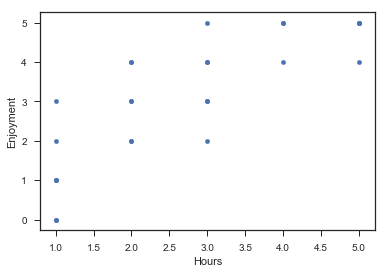

In [69]:
# Draw a scatterplot of this data.
park_data.plot(kind='scatter', x='Hours', y='Enjoyment')

In [62]:
# Try doing a linear regression on this data
lm2 = smf.ols(formula='Enjoyment ~ Hours ', data=park_data).fit()

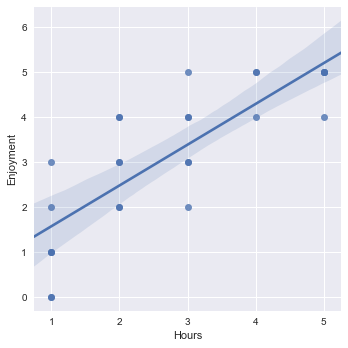

In [74]:
# Plot this regression over the top of the data. Could the regression be better?
sns.lmplot(y='Enjoyment', x='Hours', data=park_data)

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Enjoyment   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     51.47
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           1.61e-07
Time:                        20:21:03   Log-Likelihood:                -35.570
No. Observations:                  27   AIC:                             75.14
Df Residuals:                      25   BIC:                             77.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6631      0.391      1.697      0.102        -0.142     1.468
Hours          0.9067      0.126      7.174      0.000         0.646     1.167
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.660
Skew:                           0.138   Prob(JB):                        0.719
Kurtosis:                       2.285   Cond. No.                         7.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""